In [194]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

Data
====

<ul>
<li>Python has always been great for prepping and munging data, but it's never been great for analysis - you'd usually end up using R or loading it into a database and using SQL (or worse, Excel). 
<li>As a result, Wes Mckinney decided to make **pandas** - an open source library that makes data analysis easier.
</ul>


`pandas` introduces two new data structures to Python - `Series` and `DataFrame`, both of which are built on top of `NumPy` (this means it's fast).

1. [Series](#series)
2. [DataFrame](#dataframe)
3. [Titanic](#titanic)

Working with Series<a id='series'></a>
----

<ul>
<li>One-dimensional object similar to an array, list, or column in a table
<li>Will assign a labeled index to each item in the Series
<li>By default, each item will receive an index label from 0 to N
</ul>

In [5]:
s = pd.Series([7.0, 'durham', True, ('a','b'), 'Happy Days!', float(3)],
              index=['y1', 'y2', 'x1', 'x2', 'z1', 'z2'])
s

y1              7
y2         durham
x1           True
x2         (a, b)
z1    Happy Days!
z2              3
dtype: object

In [6]:
x = Series(range(1,10))
x

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64

### We can treat Series objects much like numpy vectors

In [7]:
x.sum(), x.mean(), x.std()

(45, 5.0, 2.7386127875258306)

In [8]:
sum(x), np.mean(x), (np.std(x))

(45, 5.0, 2.5819888974716112)

In [9]:
type(s)

pandas.core.series.Series

In [10]:
x**2

0     1
1     4
2     9
3    16
4    25
5    36
6    49
7    64
8    81
dtype: int64

In [11]:
x.values

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
x[x >= 8]

7    8
8    9
dtype: int64

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## EXERCISE TIME!

Append elements `10` and `11` to Series `x`.

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [87]:
## SOLUTION

print x.append(pd.Series([10,11], index=[9,10]))
print pd.Series(np.append(x.values, [10,11]))

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
dtype: int64
0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
dtype: int64


### pandas objects are finnicky when it comes to indexes

In [17]:
x.index = list('abcdefghi')
x

a    1
b    2
c    3
d    4
e    5
f    6
g    7
h    8
i    9
dtype: int64

#### Note that with labels, the end index is included

In [18]:
x['b':'g']

b    2
c    3
d    4
e    5
f    6
g    7
dtype: int64

#### Even when you have a labeled index, positional arguments still work

In [19]:
x[1:7]

b    2
c    3
d    4
e    5
f    6
g    7
dtype: int64

In [20]:
x.a, x.c, x.e

(1, 3, 5)

#### Working with missing data

Missing data is indicated with NaN (not a number).

In [21]:
y = Series([10, np.nan, np.nan, 13, 14])
y

0    10
1   NaN
2   NaN
3    13
4    14
dtype: float64

#### Concatenating two series

In [22]:
z = pd.concat([x, y])
z

a     1
b     2
c     3
d     4
e     5
f     6
g     7
h     8
i     9
0    10
1   NaN
2   NaN
3    13
4    14
dtype: float64

#### Reset index to default

In [23]:
z = z.reset_index(drop=True)
z

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10   NaN
11   NaN
12    13
13    14
dtype: float64

#### `pandas` aggregate functions ignore missing data
<li>could be dangerous if not expected

In [24]:
z.sum(), z.mean(), z.std()   

(82.0, 6.833333333333333, 4.1523998172652208)

In [25]:
z.sum(skipna = False)

nan

#### Selecting missing values

In [26]:
z[z.isnull()]

10   NaN
11   NaN
dtype: float64

#### Selecting non-missing values

In [27]:
z[z.notnull()]

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
12    13
13    14
dtype: float64

#### Replacement of missing values

In [28]:
z.fillna(0)

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10     0
11     0
12    13
13    14
dtype: float64

In [29]:
z.fillna(method='ffill') # forward fill

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    10
11    10
12    13
13    14
dtype: float64

In [30]:
z.fillna(method='bfill')

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    13
11    13
12    13
13    14
dtype: float64

In [31]:
z.fillna(z.mean())

0      1.000000
1      2.000000
2      3.000000
3      4.000000
4      5.000000
5      6.000000
6      7.000000
7      8.000000
8      9.000000
9     10.000000
10     6.833333
11     6.833333
12    13.000000
13    14.000000
dtype: float64

#### Working with dates / times

We will see more date/time handling in the DataFrame section.

In [32]:
z.index = pd.date_range('01-Jan-2016', periods=len(z))

In [33]:
z

2016-01-01     1
2016-01-02     2
2016-01-03     3
2016-01-04     4
2016-01-05     5
2016-01-06     6
2016-01-07     7
2016-01-08     8
2016-01-09     9
2016-01-10    10
2016-01-11   NaN
2016-01-12   NaN
2016-01-13    13
2016-01-14    14
Freq: D, dtype: float64

In [35]:
z.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10', '2016-01-11', '2016-01-12',
               '2016-01-13', '2016-01-14'],
              dtype='datetime64[ns]', freq='D')

#### Intelligent aggregation over datetime ranges

In [41]:
z.resample('W', how='sum')

2016-01-03     6
2016-01-10    49
2016-01-17    27
Freq: W-SUN, dtype: float64

#### Formatting datetime objects (see http://strftime.org)

In [37]:
z.index.strftime('%b %d, %Y')

array(['Jan 01, 2016', 'Jan 02, 2016', 'Jan 03, 2016', 'Jan 04, 2016',
       'Jan 05, 2016', 'Jan 06, 2016', 'Jan 07, 2016', 'Jan 08, 2016',
       'Jan 09, 2016', 'Jan 10, 2016', 'Jan 11, 2016', 'Jan 12, 2016',
       'Jan 13, 2016', 'Jan 14, 2016'], 
      dtype='|S12')

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## EXERCISE TIME

Find the mean of the values of `z` that fall on weekdays. Ignore `NaN`.


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [35]:
## SOLUTION

weekDay = (z.index.weekday >= 1) & (z.index.weekday <= 6)
z[weekDay].sum(skipNA = True)

78.0

DataFrame<a id='dataframe'></a>
---

<ul>
<li>Tablular data structure comprised of rows and columns, akin to a spreadsheet, database table, or R's data.frame <li>Like a group of Series objects that share an index (the column names)
</ul>

In [100]:
data = {
        'year': [2010, 2011, 2012, 2011, 2012, 2010, 2011, 2012, 2010, 2011, 2012],
        'team': ['Cardinals', 'Cardinals', 'Cardinals', 'Packers', 'Packers', 'Lions', 'Lions', 'Lions','49ers','49ers','49ers'],
        'wins': [11, 8, 10, 15, 11, 6, 10, 4, 8, 13, 10],
        'losses': [5, 8, 6, 1, 5, 10, 6, 12, 8, 3, 6]
       }

football = pd.DataFrame(data, columns=['year', 'team', 'wins', 'losses'])
football

,year,team,wins,losses
0,2010,Cardinals,11,5
1,2011,Cardinals,8,8
2,2012,Cardinals,10,6
3,2011,Packers,15,1
4,2012,Packers,11,5
5,2010,Lions,6,10
6,2011,Lions,10,6
7,2012,Lions,4,12
8,2010,49ers,8,8
9,2011,49ers,13,3


In [101]:
divisions = {
    'Cardinals' : "NCW",
    '49ers' : "NCW",
    'Packers' : 'NCN',
    'Lions' : 'NCN'
    }

In [102]:
football['division'] = football['team'].map(divisions)
football

,year,team,wins,losses,division
0,2010,Cardinals,11,5,NCW
1,2011,Cardinals,8,8,NCW
2,2012,Cardinals,10,6,NCW
3,2011,Packers,15,1,NCN
4,2012,Packers,11,5,NCN
5,2010,Lions,6,10,NCN
6,2011,Lions,10,6,NCN
7,2012,Lions,4,12,NCN
8,2010,49ers,8,8,NCW
9,2011,49ers,13,3,NCW


### Viewing Data

In [103]:
print football

    year       team  wins  losses division
0   2010  Cardinals    11       5      NCW
1   2011  Cardinals     8       8      NCW
2   2012  Cardinals    10       6      NCW
3   2011    Packers    15       1      NCN
4   2012    Packers    11       5      NCN
5   2010      Lions     6      10      NCN
6   2011      Lions    10       6      NCN
7   2012      Lions     4      12      NCN
8   2010      49ers     8       8      NCW
9   2011      49ers    13       3      NCW
10  2012      49ers    10       6      NCW


In [104]:
football.columns

Index([u'year', u'team', u'wins', u'losses', u'division'], dtype='object')

In [105]:
football.values

array([[2010, 'Cardinals', 11, 5, 'NCW'],
       [2011, 'Cardinals', 8, 8, 'NCW'],
       [2012, 'Cardinals', 10, 6, 'NCW'],
       [2011, 'Packers', 15, 1, 'NCN'],
       [2012, 'Packers', 11, 5, 'NCN'],
       [2010, 'Lions', 6, 10, 'NCN'],
       [2011, 'Lions', 10, 6, 'NCN'],
       [2012, 'Lions', 4, 12, 'NCN'],
       [2010, '49ers', 8, 8, 'NCW'],
       [2011, '49ers', 13, 3, 'NCW'],
       [2012, '49ers', 10, 6, 'NCW']], dtype=object)

In [106]:
football.head()

,year,team,wins,losses,division
0,2010,Cardinals,11,5,NCW
1,2011,Cardinals,8,8,NCW
2,2012,Cardinals,10,6,NCW
3,2011,Packers,15,1,NCN
4,2012,Packers,11,5,NCN


In [107]:
football.tail()

,year,team,wins,losses,division
6,2011,Lions,10,6,NCN
7,2012,Lions,4,12,NCN
8,2010,49ers,8,8,NCW
9,2011,49ers,13,3,NCW
10,2012,49ers,10,6,NCW


In [108]:
football.T    # transpose

,0,1,2,3,4,5,6,7,8,9,10
year,2010,2011,2012,2011,2012,2010,2011,2012,2010,2011,2012
team,Cardinals,Cardinals,Cardinals,Packers,Packers,Lions,Lions,Lions,49ers,49ers,49ers
wins,11,8,10,15,11,6,10,4,8,13,10
losses,5,8,6,1,5,10,6,12,8,3,6
division,NCW,NCW,NCW,NCN,NCN,NCN,NCN,NCN,NCW,NCW,NCW


In [109]:
football.sort_values(['wins'],ascending=False)

,year,team,wins,losses,division
3,2011,Packers,15,1,NCN
9,2011,49ers,13,3,NCW
0,2010,Cardinals,11,5,NCW
4,2012,Packers,11,5,NCN
2,2012,Cardinals,10,6,NCW
6,2011,Lions,10,6,NCN
10,2012,49ers,10,6,NCW
1,2011,Cardinals,8,8,NCW
8,2010,49ers,8,8,NCW
5,2010,Lions,6,10,NCN


### Selecting data

In [110]:
football['team']

0     Cardinals
1     Cardinals
2     Cardinals
3       Packers
4       Packers
5         Lions
6         Lions
7         Lions
8         49ers
9         49ers
10        49ers
Name: team, dtype: object

In [111]:
football[:5]

,year,team,wins,losses,division
0,2010,Cardinals,11,5,NCW
1,2011,Cardinals,8,8,NCW
2,2012,Cardinals,10,6,NCW
3,2011,Packers,15,1,NCN
4,2012,Packers,11,5,NCN


In [112]:
football.loc

In [113]:
football.loc[:5]  # why is this different?

,year,team,wins,losses,division
0,2010,Cardinals,11,5,NCW
1,2011,Cardinals,8,8,NCW
2,2012,Cardinals,10,6,NCW
3,2011,Packers,15,1,NCN
4,2012,Packers,11,5,NCN
5,2010,Lions,6,10,NCN


In [114]:
football.loc[:5,['team','division']]

,team,division
0,Cardinals,NCW
1,Cardinals,NCW
2,Cardinals,NCW
3,Packers,NCN
4,Packers,NCN
5,Lions,NCN


In [115]:
football.iloc

In [116]:
football.iloc[:5]  # expected?

,year,team,wins,losses,division
0,2010,Cardinals,11,5,NCW
1,2011,Cardinals,8,8,NCW
2,2012,Cardinals,10,6,NCW
3,2011,Packers,15,1,NCN
4,2012,Packers,11,5,NCN


In [117]:
football.iloc[:5,[1,4]]

,team,division
0,Cardinals,NCW
1,Cardinals,NCW
2,Cardinals,NCW
3,Packers,NCN
4,Packers,NCN


In [118]:
football.ix

In [119]:
football.ix[:5,['team','division']]

,team,division
0,Cardinals,NCW
1,Cardinals,NCW
2,Cardinals,NCW
3,Packers,NCN
4,Packers,NCN
5,Lions,NCN


### Boolean indexing

In [120]:
cards = football[football.team == 'Cardinals']
cards

,year,team,wins,losses,division
0,2010,Cardinals,11,5,NCW
1,2011,Cardinals,8,8,NCW
2,2012,Cardinals,10,6,NCW


In [121]:
football[football.team.isin(['Cardinals','Packers'])]

,year,team,wins,losses,division
0,2010,Cardinals,11,5,NCW
1,2011,Cardinals,8,8,NCW
2,2012,Cardinals,10,6,NCW
3,2011,Packers,15,1,NCN
4,2012,Packers,11,5,NCN


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## EXERCISE TIME

Find the teams that won more than 10 games in 2010.

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [122]:
## SOLUTION

football[(football.wins > 10) & (football.year == 2010)]   # comparison between lists, not single objects

,year,team,wins,losses,division
0,2010,Cardinals,11,5,NCW


### Manipulate columns

In [123]:
sum(cards['wins'])/sum(cards['losses']) # does that seem right?

1

In [124]:
cards.wins

0    11
1     8
2    10
Name: wins, dtype: int64

In [125]:
cards.loc[:,['wins']] = cards.loc[:,['wins']].astype(float)

In [126]:
cards.wins

0    11
1     8
2    10
Name: wins, dtype: float64

In [127]:
sum(cards['wins'])/sum(cards['losses'])

1.5263157894736843

In [128]:
football['win_loss'] = football.wins - football.losses
football

,year,team,wins,losses,division,win_loss
0,2010,Cardinals,11,5,NCW,6
1,2011,Cardinals,8,8,NCW,0
2,2012,Cardinals,10,6,NCW,4
3,2011,Packers,15,1,NCN,14
4,2012,Packers,11,5,NCN,6
5,2010,Lions,6,10,NCN,-4
6,2011,Lions,10,6,NCN,4
7,2012,Lions,4,12,NCN,-8
8,2010,49ers,8,8,NCW,0
9,2011,49ers,13,3,NCW,10


In [129]:
football.drop('win_loss', axis=1)

,year,team,wins,losses,division
0,2010,Cardinals,11,5,NCW
1,2011,Cardinals,8,8,NCW
2,2012,Cardinals,10,6,NCW
3,2011,Packers,15,1,NCN
4,2012,Packers,11,5,NCN
5,2010,Lions,6,10,NCN
6,2011,Lions,10,6,NCN
7,2012,Lions,4,12,NCN
8,2010,49ers,8,8,NCW
9,2011,49ers,13,3,NCW


In [130]:
football

,year,team,wins,losses,division,win_loss
0,2010,Cardinals,11,5,NCW,6
1,2011,Cardinals,8,8,NCW,0
2,2012,Cardinals,10,6,NCW,4
3,2011,Packers,15,1,NCN,14
4,2012,Packers,11,5,NCN,6
5,2010,Lions,6,10,NCN,-4
6,2011,Lions,10,6,NCN,4
7,2012,Lions,4,12,NCN,-8
8,2010,49ers,8,8,NCW,0
9,2011,49ers,13,3,NCW,10


In [131]:
football.drop('win_loss', axis=1, inplace=True) # del football['winloss']

In [132]:
football

,year,team,wins,losses,division
0,2010,Cardinals,11,5,NCW
1,2011,Cardinals,8,8,NCW
2,2012,Cardinals,10,6,NCW
3,2011,Packers,15,1,NCN
4,2012,Packers,11,5,NCN
5,2010,Lions,6,10,NCN
6,2011,Lions,10,6,NCN
7,2012,Lions,4,12,NCN
8,2010,49ers,8,8,NCW
9,2011,49ers,13,3,NCW


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## EXERCISE TIME

Create a data frame where:
<ul>
<li>The first column is a list of even numbers from `0` to `20`
<li>The second column is a list of odd numbers (up to and including `21`)
<li>The third column is the square of the sum of that row. i.e. `z[1] = (x[1] + y[1])**2`
<li>Name the columns `even`, `odd`, `sqr_sum`
<li>Make the index `a...j`
</ul>

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [133]:
## SOLUTION

import string
import numpy as np

col1 = np.arange(0,22,2)
col2 = np.arange(1,22,2)
col3 = (col1 + col2)**2

pd.DataFrame(
             data = np.array([col1,col2,col3]).T,
             columns = ['even','odd','sum_sqr_diff'],
             index = [i for i in string.ascii_lowercase[:len(col1)]]
            )

,even,odd,sum_sqr_diff
a,0,1,1
b,2,3,25
c,4,5,81
d,6,7,169
e,8,9,289
f,10,11,441
g,12,13,625
h,14,15,841
i,16,17,1089
j,18,19,1369


### Combining DataFrames
<ul>
<li>`pd.append()`
<li>`pd.concat()`
<li>`pd.merge()`
<li>`pd.join()`
</ul>

In [134]:
football

,year,team,wins,losses,division
0,2010,Cardinals,11,5,NCW
1,2011,Cardinals,8,8,NCW
2,2012,Cardinals,10,6,NCW
3,2011,Packers,15,1,NCN
4,2012,Packers,11,5,NCN
5,2010,Lions,6,10,NCN
6,2011,Lions,10,6,NCN
7,2012,Lions,4,12,NCN
8,2010,49ers,8,8,NCW
9,2011,49ers,13,3,NCW


In [135]:
cards = football[football.team=='Cardinals']
packers = football[football.team=='Packers']
lions = football[football.team=='Lions']
niners = football[football.team=='49ers']

In [136]:
packers.append([cards, niners])  # look at the index

,year,team,wins,losses,division
3,2011,Packers,15,1,NCN
4,2012,Packers,11,5,NCN
0,2010,Cardinals,11,5,NCW
1,2011,Cardinals,8,8,NCW
2,2012,Cardinals,10,6,NCW
8,2010,49ers,8,8,NCW
9,2011,49ers,13,3,NCW
10,2012,49ers,10,6,NCW


In [137]:
packers.append([cards, niners], ignore_index = True)

,year,team,wins,losses,division
0,2011,Packers,15,1,NCN
1,2012,Packers,11,5,NCN
2,2010,Cardinals,11,5,NCW
3,2011,Cardinals,8,8,NCW
4,2012,Cardinals,10,6,NCW
5,2010,49ers,8,8,NCW
6,2011,49ers,13,3,NCW
7,2012,49ers,10,6,NCW


In [138]:
packers  # unlike lists [], pd.append does not change the dataframe

,year,team,wins,losses,division
3,2011,Packers,15,1,NCN
4,2012,Packers,11,5,NCN


In [139]:
pd.concat([packers,lions,cards])

,year,team,wins,losses,division
3,2011,Packers,15,1,NCN
4,2012,Packers,11,5,NCN
5,2010,Lions,6,10,NCN
6,2011,Lions,10,6,NCN
7,2012,Lions,4,12,NCN
0,2010,Cardinals,11,5,NCW
1,2011,Cardinals,8,8,NCW
2,2012,Cardinals,10,6,NCW


In [140]:
NCN = pd.concat([packers,lions],keys=['packers','lions'])
NCN

year     team  wins  losses division
packers 3  2011  Packers    15       1      NCN
        4  2012  Packers    11       5      NCN
lions   5  2010    Lions     6      10      NCN
        6  2011    Lions    10       6      NCN
        7  2012    Lions     4      12      NCN

In [141]:
NCN.index

MultiIndex(levels=[[u'packers', u'lions'], [3, 4, 5, 6, 7]],
           labels=[[0, 0, 1, 1, 1], [0, 1, 2, 3, 4]])

In [142]:
NCN.ix['lions']

,year,team,wins,losses,division
5,2010,Lions,6,10,NCN
6,2011,Lions,10,6,NCN
7,2012,Lions,4,12,NCN


In [143]:
pd.merge(cards, packers, on = 'year', how = 'inner')

,year,team_x,wins_x,losses_x,division_x,team_y,wins_y,losses_y,division_y
0,2011,Cardinals,8,8,NCW,Packers,15,1,NCN
1,2012,Cardinals,10,6,NCW,Packers,11,5,NCN


### Groupby is a very powerful analysis tool

In [144]:
football.groupby('team', sort = False).wins.sum()

team
Cardinals    29
Packers      26
Lions        20
49ers        31
Name: wins, dtype: int64

In [145]:
football.groupby('team').get_group('Cardinals')

,year,team,wins,losses,division
0,2010,Cardinals,11,5,NCW
1,2011,Cardinals,8,8,NCW
2,2012,Cardinals,10,6,NCW


In [146]:
football.groupby(['division','team']).groups

{('NCN', 'Lions'): [5, 6, 7],
 ('NCN', 'Packers'): [3, 4],
 ('NCW', '49ers'): [8, 9, 10],
 ('NCW', 'Cardinals'): [0, 1, 2]}

In [147]:
football.groupby(['division','team']).get_group(('NCW','Cardinals'))

,year,team,wins,losses,division
0,2010,Cardinals,11,5,NCW
1,2011,Cardinals,8,8,NCW
2,2012,Cardinals,10,6,NCW


In [148]:
grouped = football.groupby(['division','team'])

In [149]:
grouped.wins.sum()

division  team     
NCN       Lions        20
          Packers      26
NCW       49ers        31
          Cardinals    29
Name: wins, dtype: int64

In [150]:
for grp, i in grouped:
    print grp

('NCN', 'Lions')
('NCN', 'Packers')
('NCW', '49ers')
('NCW', 'Cardinals')


In [151]:
for grp, i in grouped:
    print i

   year   team  wins  losses division
5  2010  Lions     6      10      NCN
6  2011  Lions    10       6      NCN
7  2012  Lions     4      12      NCN
   year     team  wins  losses division
3  2011  Packers    15       1      NCN
4  2012  Packers    11       5      NCN
    year   team  wins  losses division
8   2010  49ers     8       8      NCW
9   2011  49ers    13       3      NCW
10  2012  49ers    10       6      NCW
   year       team  wins  losses division
0  2010  Cardinals    11       5      NCW
1  2011  Cardinals     8       8      NCW
2  2012  Cardinals    10       6      NCW


### Pivot Tables

In [152]:
football

,year,team,wins,losses,division
0,2010,Cardinals,11,5,NCW
1,2011,Cardinals,8,8,NCW
2,2012,Cardinals,10,6,NCW
3,2011,Packers,15,1,NCN
4,2012,Packers,11,5,NCN
5,2010,Lions,6,10,NCN
6,2011,Lions,10,6,NCN
7,2012,Lions,4,12,NCN
8,2010,49ers,8,8,NCW
9,2011,49ers,13,3,NCW


In [153]:
pd.pivot_table(football, values = ['wins','losses'], index = ['team'], columns = 'year').reset_index()

team wins           losses          
year            2010 2011 2012   2010 2011 2012
0         49ers    8   13   10      8    3    6
1     Cardinals   11    8   10      5    8    6
2         Lions    6   10    4     10    6   12
3       Packers  NaN   15   11    NaN    1    5

### Can apply functions to columns

In [154]:
grouped.aggregate([np.sum, np.mean, np.max])

year               wins                 losses            \
                     sum    mean  amax  sum       mean amax    sum      mean   
division team                                                                  
NCN      Lions      6033  2011.0  2012   20   6.666667   10     28  9.333333   
         Packers    4023  2011.5  2012   26  13.000000   15      6  3.000000   
NCW      49ers      6033  2011.0  2012   31  10.333333   13     17  5.666667   
         Cardinals  6033  2011.0  2012   29   9.666667   11     19  6.333333   

                         
                   amax  
division team            
NCN      Lions       12  
         Packers      5  
NCW      49ers        8  
         Cardinals    8

In [155]:
football['playoffs'] = football.wins.apply(lambda x: x >= 10)
football

,year,team,wins,losses,division,playoffs
0,2010,Cardinals,11,5,NCW,True
1,2011,Cardinals,8,8,NCW,False
2,2012,Cardinals,10,6,NCW,True
3,2011,Packers,15,1,NCN,True
4,2012,Packers,11,5,NCN,True
5,2010,Lions,6,10,NCN,False
6,2011,Lions,10,6,NCN,True
7,2012,Lions,4,12,NCN,False
8,2010,49ers,8,8,NCW,False
9,2011,49ers,13,3,NCW,True


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## EXERCISE TIME

How much percent better is the year with the **highest** `win/loss` percentage (for the whole league) than the year with the **second highest** `win/loss` percentage (for the whole league)? *Challenge: Do this in under 3 lines!*

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [156]:
## SOLUTION

vals = (football.groupby(['year']).wins.sum()/football.groupby(['year']).losses.sum()).values
vals[np.argsort(vals)][::-1][0]/vals[np.argsort(vals)][::-1][1]

2.1174603174603175

### Reading in data is easy

<ul>
<li>`read_csv`
<li>`read_excel`
<li>`read_sql`
<li>`read_json`
<li>`read_html`
<li>`read_pickle`
</ul>

Review Problem: Analyzing the Titanic<a id='titanic'></a>
---

In [157]:
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv'
titanic = pd.read_csv(url)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Answer the following questions. Try to use `pandas` specific functions where possible.

<ol>
<li>Remove unnecessary columns. *Are there any redundant ones?*
<li>Provide some basic summaries
<ul>
<li>Count of male vs. female
<li>Average age of adult men and adult women
<li>Distribution of First, Second and Third class people. Make a histogram too using `pandas` `hist()`.
</ul>
<li>What proportion of children survived?
<li>What proprtion of teenagers survived?
<li>How much money did the Titanic bring in on this voyage from each class? What was the total?
<li>Replace the age of missing people with the average age from people of that same gender. Hint: think about `apply`ing a function to each row of the `age` column 
<li>What is the probability that Kate Winslett survives and Leonardo DiCaprio doesn't? Use your judgement in determining how to calculate this.
</ol>

Try to use `pivot_table` for summaries, `groupby` for grouping column values together and `apply` for special functions.

In [299]:
## SOLUTION

df = titanic.drop(titanic[['embark_town','adult_male','alive','class']],axis=1)

In [300]:
len(df[df.sex=='male']), len(df[df.sex=='female'])

(577, 314)

In [301]:
df[df.who=='man'].age.mean(), df[df.who=='woman'].age.mean()

(33.173123486682812, 32.0)

In [302]:
df.pclass.value_counts(normalize=True)

3    0.551066
1    0.242424
2    0.206510
Name: pclass, dtype: float64

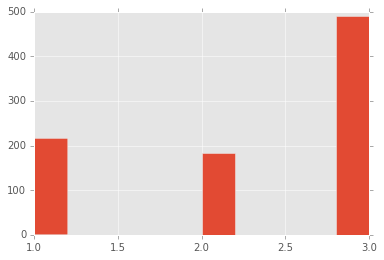

In [303]:
df.pclass.hist()
pass

In [304]:
alive_child = df[df.who=='child'].survived.value_counts().values[0].astype(float)
all_child = df[df.who=='child'].survived.value_counts().sum()
alive_child/all_child

0.59036144578313254

In [305]:
alive_teen = df[(df.age<20)&(df.age>12)].survived.value_counts().values[0].astype(float)
all_teen = df[(df.age<20)&(df.age>12)].survived.value_counts().sum()
alive_teen/all_teen

0.58947368421052626

In [306]:
df.groupby(df.pclass).fare.sum()

pclass
1    18177.4125
2     3801.8417
3     6714.6951
Name: fare, dtype: float64

In [307]:
sum(df.groupby(df.pclass).fare.sum().values)

28693.949299999986

In [318]:
df[df.age.notnull()].groupby(['sex']).mean().age

sex
female    27.915709
male      30.726645
Name: age, dtype: float64

In [319]:
m = df[df.age.notnull()].groupby(['sex']).mean().age

df['age'] = df.apply(lambda row: m[row['sex']] if pd.isnull(row['age']) else row['age'], axis=1) 

In [331]:
sex_class = df.groupby(['sex', 'pclass'])
probs = sex_class.mean()

#print probs['survived']

print "Probability that Kate survives: {}".format(round(probs['survived'].values[0],2))
print "Prob that Leo survives: {}".format(round(probs['survived'].values[::-1][0],2))

Probability that Kate survives: 0.97
Prob that Leo survives: 0.14
